In [3]:
!pip install scikit-learn sentence-transformers umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 593.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=61935b0340b0568ac89b496942cd2842b8521f5a488318bc37140c499011f7ad
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=adb36876634f0a57d98316bac472752890739fd48e279cffb18afc0121beda02
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built sentence-transformers uma

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt

In [26]:
from sklearn.cluster import KMeans

In [10]:
# import train data
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
corpus_train = train_data.data[:2000]
labels_train = train_data.target[:2000]

In [14]:
train = pd.DataFrame({'Document': corpus_train, 'Category': labels_train})

In [15]:
train.head(5)

,Document,Category
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [8]:
train['Category'].unique(), train['Category'].nunique()

(array([ 7,  4,  1, 14, 16, 13,  3,  2,  8, 19,  6,  0, 12,  5, 10,  9, 15,
        17, 18, 11]),
 20)

In [13]:
train.shape

(2000, 2)

In [ ]:
'''# import test data
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
corpus_test = test.data[:00]
labels_test = test.target[:00]
k = len(set(labels_test))'''

In [ ]:
#test = pd.DataFrame({'Document': corpus_test, 'Category': labels_test})

In [ ]:
#test.head()

In [ ]:
#test['Category'].unique(), test['Category'].nunique()

(array([ 7,  5,  0, 17, 19, 13, 15,  1,  2,  8,  4,  6, 16, 14,  3, 11,  9,
        10, 18, 12]),
 20)

In [16]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus_train)

In [18]:
embeddings.shape

(2000, 384)

In [ ]:
#embeddings_test = model.encode(corpus_test)

In [19]:
def umap_dim_red(mat, p):
    umap_model = UMAP(n_components=p)
    red_mat = umap_model.fit_transform(mat)
    return red_mat

p = 3
red_emd = umap_dim_red(embeddings, p)

In [21]:
red_emd

array([[-0.1765905 ,  4.211124  ,  4.4360976 ],
       [-1.9050678 ,  3.6663842 ,  5.861552  ],
       [-1.3879799 ,  3.481166  ,  6.107167  ],
       ...,
       [-0.10204551,  3.6359935 ,  5.125573  ],
       [ 1.8823137 ,  8.109853  ,  5.3942447 ],
       [ 1.3087146 ,  8.64461   ,  6.6044197 ]], dtype=float32)

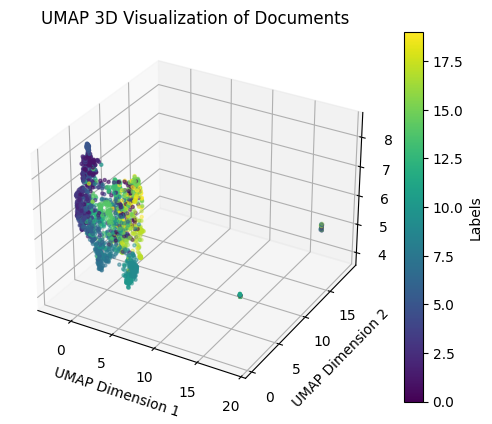

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming red_emd is a 3D array resulting from UMAP
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(red_emd[:, 0], red_emd[:, 1], red_emd[:, 2], c=labels_train, cmap='viridis', s=5)

ax.set_title('UMAP 3D Visualization of Documents')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')

# Add a colorbar for better interpretation of labels
fig.colorbar(scatter, ax=ax, label='Labels')

plt.show()

In [53]:
import plotly.express as px

# Assuming red_emd is a 3D array resulting from UMAP
fig = px.scatter_3d(x=red_emd[:, 0], y=red_emd[:, 1], z=red_emd[:, 2], color=labels_train, opacity=0.7,
                    title='UMAP 3D Visualization of Documents', labels={'x': 'UMAP Dimension 1', 'y': 'UMAP Dimension 2', 'z': 'UMAP Dimension 3'},
                    color_continuous_scale='viridis', size_max=5)

fig.show()

In [23]:
def clust(mat, k):

    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(mat)

    return pred

In [27]:
pred = clust(red_emd, 20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
pred

array([14,  1,  1, ..., 14,  9,  0], dtype=int32)

In [51]:
def score(pred, labels_train):
  nmi_score = normalized_mutual_info_score(pred, labels_train)
  ari_score = adjusted_rand_score(pred, labels_train)

  print(f'NMI: {nmi_score:.2f}\nARI: {ari_score:.2f}')

  return(nmi_score, ari_score)

In [33]:
score(pred, labels_train)

NMI: 0.47
ARI: 0.30


In [52]:
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
all_indices = np.arange(len(train_data.data))
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
l_nmi = []
l_ari = []

for i in range(10):

  np.random.shuffle(all_indices)

  selected_indices = all_indices[:2000]

  corpus_train = [train_data.data[i] for i in selected_indices]
  labels_train = [train_data.target[i] for i in selected_indices]

  train = pd.DataFrame({'Document': corpus_train, 'Category': labels_train})

  embeddings = model.encode(corpus_train)

  p = 3
  red_emd = umap_dim_red(embeddings, p)

  pred = clust(red_emd, 20)
  nmi_score, ari_score = score(pred, labels_train)
  l_nmi.append(nmi_score)
  l_ari.append(ari_score)

  mean_nmi = np.mean(l_nmi)
  mean_ari = np.mean(l_ari)
  std_nmi = np.std(l_nmi)
  std_ari = np.std(l_ari)

print(f'Pour {i+1} echantillon de donnees voici la moyenne de chaque metrique et l ecart type: \n NMI: {mean_nmi:.2f} (+/- {std_nmi:.2f}) \n ARI: {mean_ari:.2f} (+/- {std_ari:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.47
ARI: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.48
ARI: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.47
ARI: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.50
ARI: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.47
ARI: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.48
ARI: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.48
ARI: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.48
ARI: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.50
ARI: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.48
ARI: 0.31
Pour 10 echantillon de donnees voici la moyenne de chaque metrique et l ecart type: 
 NMI: 0.48 (+/- 0.01) 
 ARI: 0.31 (+/- 0.01


In [47]:
l=[0.5,0.6]
# np.mean(l)
np.std(l)


0.04999999999999999